In [1]:
import pandas as pd

# 6. Dataframes_V: MultiIndex

### Table of Contents

1. Create a MultiIndex
2. Extract Index Level Values
3. Rename Index Levels
4. The sort_index Method on a MultiIndex DataFrame
5. Extract Rows from a MultiIndex DataFrame
6. The transpose Method
7. The stack Method
8. The unstack Method
9. The pivot Method


## This Module's Dataset

In [2]:
bigmac = pd.read_csv("bigmac.csv", parse_dates=["Date"], date_format="%Y-%m-%d")
bigmac.head()

,Date,Country,Price in US dollars
0,2000-04-01,Argentina,2.500000
1,2000-04-01,Australia,1.541667
2,2000-04-01,Brazil,1.648045
3,2000-04-01,Canada,1.938776
4,2000-04-01,Switzerland,3.470588


In [3]:
bigmac.dtypes

Date                   datetime64[ns]
Country                        object
Price in US dollars           float64
dtype: object

In [4]:
bigmac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1386 non-null   datetime64[ns]
 1   Country              1386 non-null   object        
 2   Price in US dollars  1386 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 32.6+ KB


## 1. Create a MultiIndex

- A **MultiIndex** is an index with multiple levels or layers.
- Pass the `set_index` method a list of column names to create a multi-index DataFrame.
- The order of the list's values will determine the order of the levels.
- Alternatively, we can pass the `read_csv` function's `index_col` parameter a list of columns.


In [5]:
# load dataset

bigmac = pd.read_csv("bigmac.csv", parse_dates=["Date"], date_format="%Y-%m-%d")
bigmac.head()

,Date,Country,Price in US dollars
0,2000-04-01,Argentina,2.500000
1,2000-04-01,Australia,1.541667
2,2000-04-01,Brazil,1.648045
3,2000-04-01,Canada,1.938776
4,2000-04-01,Switzerland,3.470588


In [6]:
# why would we want a multi Index?
# Ideally, an index is an identifier of a row, preferably unique
# However, in this dataset, none of values for the columns in themselves are good candidates for being such an identifier:
# - Date in itself does not to tell us at all what this dataset is about
# - nor does Country in itself
# None of these are, moreover unique, as the same date reappears multiple times & the same country as well
# But combined these 2 columns make up a unique key (think of relational databases)
# A multi-index is an index that consists of several layers
# In this case, it would exist of 2 layers:

# 2 ways to do this:

# 1) way 1: use set_index

bigmac.set_index(keys = ["Date","Country"]) # we therefore pass in a list with 2 column names for the set_index('keys= ')-parameter

Price in US dollars
Date       Country                           
2000-04-01 Argentina                 2.500000
           Australia                 1.541667
           Brazil                    1.648045
           Canada                    1.938776
           Switzerland               3.470588
...                                       ...
2020-07-01 Ukraine                   2.174714
           Uruguay                   4.327418
           United States             5.710000
           Vietnam                   2.847282
           South Africa              1.859349

[1386 rows x 1 columns]

In [7]:
# this representation looks much clearer and intuitive

# the order of keys in list matters
bigmac.set_index(keys = ["Country","Date"]).sort_index() # more on .sort_index() method in §4


Price in US dollars
Country   Date                           
Argentina 2000-04-01             2.500000
          2001-04-01             2.500000
          2002-04-01             0.798722
          2003-04-01             1.423611
          2004-05-01             1.477966
...                                   ...
Vietnam   2018-07-01             2.821242
          2019-01-01             2.801845
          2019-07-09             2.797985
          2020-01-14             2.847774
          2020-07-01             2.847282

[1386 rows x 1 columns]

In [8]:
# what key should we put in the first & what column(s) in the subsequent position(s)?
# rule of thumb: 
# the subkey with the least different unique values in the outermost layer, the one with the second-least unique values in the next layer, etc
# reason: easier to narrow down for Pandas

bigmac.nunique()

Date                     33
Country                  57
Price in US dollars    1350
dtype: int64

In [9]:
# we see that Date has the smallest number of unique values, so we set Date as first layer, Country as second
bigmac = bigmac.set_index(keys = ["Date","Country"])
bigmac.head()

Price in US dollars
Date       Country                         
2000-04-01 Argentina               2.500000
           Australia               1.541667
           Brazil                  1.648045
           Canada                  1.938776
           Switzerland             3.470588

In [10]:
# 2) way 2: use argument index_col when reading csv

bigmac = pd.read_csv("bigmac.csv", parse_dates=["Date"], date_format="%Y-%m-%d", index_col = ["Date","Country"]).sort_index() # more on .sort_index() method in §4
bigmac.head()

Price in US dollars
Date       Country                       
2000-04-01 Argentina             2.500000
           Australia             1.541667
           Brazil                1.648045
           Britain               3.002000
           Canada                1.938776

In [11]:
# when we access the index with .index attribute we see we are now dealing with a MultiIndex consisting of 2 layers:

bigmac.index

MultiIndex([('2000-04-01',            'Argentina'),
            ('2000-04-01',            'Australia'),
            ('2000-04-01',               'Brazil'),
            ('2000-04-01',              'Britain'),
            ('2000-04-01',               'Canada'),
            ('2000-04-01',                'Chile'),
            ('2000-04-01',                'China'),
            ('2000-04-01',       'Czech Republic'),
            ('2000-04-01',              'Denmark'),
            ('2000-04-01',            'Euro area'),
            ...
            ('2020-07-01',               'Sweden'),
            ('2020-07-01',          'Switzerland'),
            ('2020-07-01',               'Taiwan'),
            ('2020-07-01',             'Thailand'),
            ('2020-07-01',               'Turkey'),
            ('2020-07-01',              'Ukraine'),
            ('2020-07-01', 'United Arab Emirates'),
            ('2020-07-01',        'United States'),
            ('2020-07-01',              'Uruguay

In [12]:
bigmac.index.names # we can consult the names attribute via the index attribute

FrozenList(['Date', 'Country'])

In [13]:
bigmac.index[0] # we can also enter into the index and access any specific index's label by subsetting

(Timestamp('2000-04-01 00:00:00'), 'Argentina')

## 2. Extract Index Level Values

- The `get_level_values` method extracts an Index with the values from one level in the MultiIndex.
- Invoke the `get_level_values` on the MultiIndex, not the DataFrame itself.
- The method expects either the level's index position or its name.



In [14]:
# import multi-index dataset
# Date in outermost layer = position 0, Country in next layer = position 1

bigmac = pd.read_csv("bigmac.csv", parse_dates=["Date"], date_format="%Y-%m-%d", index_col = ["Date","Country"]).sort_index() 
bigmac.head()

Price in US dollars
Date       Country                       
2000-04-01 Argentina             2.500000
           Australia             1.541667
           Brazil                1.648045
           Britain               3.002000
           Canada                1.938776

In [15]:
# we can extract index label of each layer separately

bigmac.index.get_level_values("Date") # we can specify Name Label of key
bigmac.index.get_level_values(0) # or its index position as an argument to extract its values

# REMARK:
# we call .get_level_values() method on MultiIndex object which results from calling .index attribute on dataset 
# so, we do NOT call the get_level_values() method directly on Df itself, but on MultiIndex object of Df

DatetimeIndex(['2000-04-01', '2000-04-01', '2000-04-01', '2000-04-01',
               '2000-04-01', '2000-04-01', '2000-04-01', '2000-04-01',
               '2000-04-01', '2000-04-01',
               ...
               '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01',
               '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01',
               '2020-07-01', '2020-07-01'],
              dtype='datetime64[ns]', name='Date', length=1386, freq=None)

## 3. Rename Index Levels

- Invoke the `set_names` method on the MultiIndex to change one or more level names.
- Use the `names` and `level` parameter to target a nested index at a given level.
- Alternatively, pass `names` a list of strings to overwrite all level names.
- The `set_names` method returns a copy, so replace the original index to alter the DataFrame.


In [16]:
# import multi-index dataset
# Date in outermost layer = position 0, Country in next layer = position 1

bigmac = pd.read_csv("bigmac.csv", parse_dates=["Date"], date_format="%Y-%m-%d", index_col = ["Date","Country"]).sort_index() 
bigmac.head()

Price in US dollars
Date       Country                       
2000-04-01 Argentina             2.500000
           Australia             1.541667
           Brazil                1.648045
           Britain               3.002000
           Canada                1.938776

In [17]:
# We want to set a new name for the outermost layer "Date"

bigmac.index.set_names(names = "Time", level = 0) 

# REMARK:
# again, we do not call method .set_names() directly on Df, 
# but on MultiIndex which results from calling .index attribute on Df

# check documentation by typing shift+tab: set_names(names = ... , level = ... )
# names = new label we want to set for a layer
# level = layer we want to rename

MultiIndex([('2000-04-01',            'Argentina'),
            ('2000-04-01',            'Australia'),
            ('2000-04-01',               'Brazil'),
            ('2000-04-01',              'Britain'),
            ('2000-04-01',               'Canada'),
            ('2000-04-01',                'Chile'),
            ('2000-04-01',                'China'),
            ('2000-04-01',       'Czech Republic'),
            ('2000-04-01',              'Denmark'),
            ('2000-04-01',            'Euro area'),
            ...
            ('2020-07-01',               'Sweden'),
            ('2020-07-01',          'Switzerland'),
            ('2020-07-01',               'Taiwan'),
            ('2020-07-01',             'Thailand'),
            ('2020-07-01',               'Turkey'),
            ('2020-07-01',              'Ukraine'),
            ('2020-07-01', 'United Arab Emirates'),
            ('2020-07-01',        'United States'),
            ('2020-07-01',              'Uruguay

In [18]:
# we can also change names of all layers at same time 
# by passing in list with new names in correct layer order
# in that case, we can skip 'level' argument altogether

bigmac.index.set_names(names = ["Time","Location"])

MultiIndex([('2000-04-01',            'Argentina'),
            ('2000-04-01',            'Australia'),
            ('2000-04-01',               'Brazil'),
            ('2000-04-01',              'Britain'),
            ('2000-04-01',               'Canada'),
            ('2000-04-01',                'Chile'),
            ('2000-04-01',                'China'),
            ('2000-04-01',       'Czech Republic'),
            ('2000-04-01',              'Denmark'),
            ('2000-04-01',            'Euro area'),
            ...
            ('2020-07-01',               'Sweden'),
            ('2020-07-01',          'Switzerland'),
            ('2020-07-01',               'Taiwan'),
            ('2020-07-01',             'Thailand'),
            ('2020-07-01',               'Turkey'),
            ('2020-07-01',              'Ukraine'),
            ('2020-07-01', 'United Arab Emirates'),
            ('2020-07-01',        'United States'),
            ('2020-07-01',              'Uruguay

In [19]:
# if we want to keep these new label names we can re-assign them to MultiIndex

bigmac.index = bigmac.index.set_names(names = ["Time","Location"])
bigmac.head()

Price in US dollars
Time       Location                      
2000-04-01 Argentina             2.500000
           Australia             1.541667
           Brazil                1.648045
           Britain               3.002000
           Canada                1.938776

## 4. The `sort_index` Method on a MultiIndex DataFrame

- Using the `sort_index` method, we can target all levels or specific levels of the MultiIndex.
- To apply a different sort order to different levels, pass a list of Booleans.


In [20]:
# import multi-index dataset WITHOUT sort.index()
# Date in outermost layer = position 0, Country in next layer = position 1

bigmac = pd.read_csv("bigmac.csv", parse_dates=["Date"], date_format="%Y-%m-%d", index_col = ["Date","Country"]) # WITHOUT sort.index() this time
bigmac.head()

Price in US dollars
Date       Country                         
2000-04-01 Argentina               2.500000
           Australia               1.541667
           Brazil                  1.648045
           Canada                  1.938776
           Switzerland             3.470588

In [21]:
bigmac.sort_index() # by default a) from outermost --> innermost layer, and b) in each layer in ascending order

# we don't see a large difference in our Df because it was already ordered in ascending order

Price in US dollars
Date       Country                                  
2000-04-01 Argentina                        2.500000
           Australia                        1.541667
           Brazil                           1.648045
           Britain                          3.002000
           Canada                           1.938776
...                                              ...
2020-07-01 Ukraine                          2.174714
           United Arab Emirates             4.015846
           United States                    5.710000
           Uruguay                          4.327418
           Vietnam                          2.847282

[1386 rows x 1 columns]

In [22]:
bigmac.sort_index(ascending = False) # for b): we can also sort each layer in descending order

Price in US dollars
Date       Country                                  
2020-07-01 Vietnam                          2.847282
           Uruguay                          4.327418
           United States                    5.710000
           United Arab Emirates             4.015846
           Ukraine                          2.174714
...                                              ...
2000-04-01 Canada                           1.938776
           Britain                          3.002000
           Brazil                           1.648045
           Australia                        1.541667
           Argentina                        2.500000

[1386 rows x 1 columns]

In [23]:
bigmac.sort_index(ascending = [False,True]) # for b): if you want to sort both layers in different order: 
# Date in descending order, Country in ascending order

Price in US dollars
Date       Country                           
2020-07-01 Argentina                 3.509232
           Australia                 4.578450
           Azerbaijan                2.324897
           Bahrain                   3.713035
           Brazil                    3.913528
...                                       ...
2000-04-01 Sweden                    2.714932
           Switzerland               3.470588
           Taiwan                    2.287582
           Thailand                  1.447368
           United States             2.510000

[1386 rows x 1 columns]

## 5. Extract Rows from a MultiIndex DataFrame

- A tuple is an immutable list. It cannot be modified after creation.
- Create a tuple with a comma between elements. The community convention is to wrap the elements in parentheses.
- The `iloc` and `loc` accessors are available to extract rows by index position or label.
- For the `loc` accessor, pass a tuple to hold the labels from the index levels.


In [24]:
# import multi-index dataset 
# Date in outermost layer = position 0, Country in next layer = position 1

bigmac = pd.read_csv("bigmac.csv", parse_dates=["Date"], date_format="%Y-%m-%d", index_col = ["Date","Country"]).sort_index()
bigmac.head()

Price in US dollars
Date       Country                       
2000-04-01 Argentina             2.500000
           Australia             1.541667
           Brazil                1.648045
           Britain               3.002000
           Canada                1.938776

In [25]:
# a tuple is immutable, therefore a good candidate to hold the MultiIndex

# each row retains a unique index position
# therefore, we can use .iloc[] accessor as we normally do

bigmac.iloc[2] # here we ask for the third row
# we see the values for the MultiIndex in the tuple for the Label
# we see the value of the only remaining third column as the value we asked for for this 3th row

Price in US dollars    1.648045
Name: (2000-04-01 00:00:00, Brazil), dtype: float64

In [26]:
# with .loc[] things become more complicated 

# example 
bigmac.loc["2000-04-01"] # we step into this outermost layer

,Price in US dollars
Country,
Argentina,2.500000
Australia,1.541667
Brazil,1.648045
Britain,3.002000
Canada,1.938776
Chile,2.451362
China,1.195652
Czech Republic,1.390537
Denmark,3.078358


In [27]:
bigmac.loc[("2000-04-01", "Canada")] # specify row index labels

Price in US dollars    1.938776
Name: (2000-04-01 00:00:00, Canada), dtype: float64

In [28]:
bigmac.loc[("2000-04-01", "Canada"), "Price in US dollars"] # to designate column label for MultiIndex

1.93877551020408

## 6. The transpose Method

- The `transpose` method inverts/flips the horizontal and vertical axes of the DataFrame:
  columns become rows, and vice versa.


In [29]:
# import multi-index dataset 

bigmac = pd.read_csv("bigmac.csv", parse_dates=["Date"], date_format="%Y-%m-%d", index_col = ["Date","Country"]).sort_index()
bigmac.head()

Price in US dollars
Date       Country                       
2000-04-01 Argentina             2.500000
           Australia             1.541667
           Brazil                1.648045
           Britain               3.002000
           Canada                1.938776

In [30]:
# extract range of values between 2 values on layer 2 for same value of layer 1

start = ("2018-01-01", "China")
end = ("2018-01-01", "Denmark")

bigmac.loc[start:end]

Price in US dollars
Date       Country                            
2018-01-01 China                      3.171642
           Colombia                   3.832468
           Costa Rica                 4.027932
           Czech Republic             3.807779
           Denmark                    4.932020

In [31]:
bigmac.loc[start:end].transpose() # multi-index moved to columns
# also possible to have multi-index rows and multi-index columns

Date                2018-01-01                                             
Country                  China  Colombia Costa Rica Czech Republic  Denmark
Price in US dollars   3.171642  3.832468   4.027932       3.807779  4.93202

## 7. The `stack` Method

- The `stack` method moves the column index to the row index:
  take column labels and move them in as an additional layer in row index.
- Pandas will return a MultiIndex Series.
- Think of it like "stacking" index levels for a MultiIndex.

In [32]:
# new dataset

pd.read_csv("worldstats.csv")

,country,year,Population,GDP
0,Arab World,2015,392022276.0,2.530102e+12
1,Arab World,2014,384222592.0,2.873600e+12
2,Arab World,2013,376504253.0,2.846994e+12
3,Arab World,2012,368802611.0,2.773270e+12
4,Arab World,2011,361031820.0,2.497945e+12
...,...,...,...,...
11206,Zimbabwe,1964,4279561.0,1.217138e+09
11207,Zimbabwe,1963,4140804.0,1.159512e+09
11208,Zimbabwe,1962,4006262.0,1.117602e+09
11209,Zimbabwe,1961,3876638.0,1.096647e+09


In [33]:
# what label? Again: a good identifier would be Multi-Index label with country and year
# which of these outermost, which innermost layer? Check for least unique values:

pd.read_csv("worldstats.csv").nunique()

country         252
year             56
Population    11067
GDP           11065
dtype: int64

In [34]:
# year has less unique values than country, so best candidate for outermost layer

pd.read_csv("worldstats.csv", index_col=["year", "country"])

,,Population,GDP
year,country,,
2015,Arab World,392022276.0,2.530102e+12
2014,Arab World,384222592.0,2.873600e+12
2013,Arab World,376504253.0,2.846994e+12
2012,Arab World,368802611.0,2.773270e+12
2011,Arab World,361031820.0,2.497945e+12
...,...,...,...
1964,Zimbabwe,4279561.0,1.217138e+09
1963,Zimbabwe,4140804.0,1.159512e+09
1962,Zimbabwe,4006262.0,1.117602e+09


In [35]:
# this doesn't look nice at all & computationally hard to search, 
# because keys are not sorted: therefore, also sort 

world = pd.read_csv("worldstats.csv", index_col=["year", "country"]).sort_index()
world.head()

Population           GDP
year country                               
1960 Afghanistan    8994793.0  5.377778e+08
     Algeria       11124892.0  2.723638e+09
     Australia     10276477.0  1.856759e+10
     Austria        7047539.0  6.592694e+09
     Bahamas, The    109526.0  1.698023e+08

In [36]:
world.stack()
# what we get back is a multi-index Series
# each row in column is unique
# for every single row 3 unique identifiers: 
# year, country, and then a column with both values for
# Population and GDP which technically has no name

year  country                
1960  Afghanistan  Population    8.994793e+06
                   GDP           5.377778e+08
      Algeria      Population    1.112489e+07
                   GDP           2.723638e+09
      Australia    Population    1.027648e+07
                                     ...     
2015  World        GDP           7.343364e+13
      Zambia       Population    1.621177e+07
                   GDP           2.120156e+10
      Zimbabwe     Population    1.560275e+07
                   GDP           1.389294e+10
Length: 22422, dtype: float64

In [37]:
type(world.stack())

pandas.core.series.Series

In [38]:
# can also turn Series object into Df

world.stack().to_frame() # we see that unnamed new 3th layer is jsut given index 0 by Pandas

0
year country                             
1960 Afghanistan Population  8.994793e+06
                 GDP         5.377778e+08
     Algeria     Population  1.112489e+07
                 GDP         2.723638e+09
     Australia   Population  1.027648e+07
...                                   ...
2015 World       GDP         7.343364e+13
     Zambia      Population  1.621177e+07
                 GDP         2.120156e+10
     Zimbabwe    Population  1.560275e+07
                 GDP         1.389294e+10

[22422 rows x 1 columns]

## 8. The `unstack` Method

- The `unstack` method moves a row index to the column index (the inverse of the `stack` method).
- By default, the `unstack` method will move the innermost index.
- We can customize the moved index with the `level` parameter.
- The `level` parameter accepts the level's index position or its name. It can also accept a list of positions/names.


In [39]:
# import dataset

world = pd.read_csv("worldstats.csv", index_col=["year", "country"]).sort_index().stack()
world.head()

year  country                
1960  Afghanistan  Population    8.994793e+06
                   GDP           5.377778e+08
      Algeria      Population    1.112489e+07
                   GDP           2.723638e+09
      Australia    Population    1.027648e+07
dtype: float64

In [40]:
world.unstack() # will move innermost row index level to column axis
# in this case: the unnamed 3th row identifier will be set back again to the column axis

Population           GDP
year country                                       
1960 Afghanistan         8.994793e+06  5.377778e+08
     Algeria             1.112489e+07  2.723638e+09
     Australia           1.027648e+07  1.856759e+10
     Austria             7.047539e+06  6.592694e+09
     Bahamas, The        1.095260e+05  1.698023e+08
...                               ...           ...
2015 Vietnam             9.170380e+07  1.935994e+11
     West Bank and Gaza  4.422143e+06  1.267740e+10
     World               7.346633e+09  7.343364e+13
     Zambia              1.621177e+07  2.120156e+10
     Zimbabwe            1.560275e+07  1.389294e+10

[11211 rows x 2 columns]

In [41]:
world.unstack().columns # when we call columns attribute on this Df we see that 
# we have 2 normal, single, simple index labels for the columns

Index(['Population', 'GDP'], dtype='object')

In [42]:
# if we now call unstack() again upon this Df, the next innermost row index layer
# will be moved to the column axis, in this case the country level

world.unstack().unstack()

Population                                              \
country Afghanistan    Albania     Algeria  Andorra      Angola   
year                                                              
1960      8994793.0        NaN  11124892.0      NaN         NaN   
1961      9164945.0        NaN  11404859.0      NaN         NaN   
1962      9343772.0        NaN  11690152.0      NaN         NaN   
1963      9531555.0        NaN  11985130.0      NaN         NaN   
1964      9728645.0        NaN  12295973.0      NaN         NaN   
1965      9935358.0        NaN  12626953.0      NaN         NaN   
1966     10148841.0        NaN  12980269.0      NaN         NaN   
1967     10368600.0        NaN  13354197.0      NaN         NaN   
1968     10599790.0        NaN  13744383.0      NaN         NaN   
1969     10849510.0        NaN  14144437.0      NaN         NaN   
1970     11121097.0        NaN  14550033.0  24279.0         NaN   
1971     11412821.0        NaN  14960111.0  25560.0         NaN   
1972     11716896.0        NaN  15377095.0  26892.0         NaN   
1973     12022514.0        NaN  15804428.0  28231.0         NaN   
1974     12315553.0        NaN  16247113.0  29514.0         NaN   
1975     12582954.0        NaN  16709098.0  30706.0         NaN   
1976     12831361.0        NaN  17190236.0  31781.0         NaN   
1977     13056499.0        NaN  17690184.0  32769.0         NaN   
1978     13222547.0        NaN  18212331.0  33746.0         NaN   
1979     13283279.0        NaN  18760761.0  34819.0         NaN   
1980     13211412.0        NaN  19337723.0  36063.0         NaN   
1981     12996923.0        NaN  19943667.0  37502.0         NaN   
1982            NaN        NaN  20575701.0  39112.0         NaN   
1983            NaN        NaN  21228288.0  40862.0         NaN   
1984            NaN  2904429.0  21893857.0  42704.0         NaN   
1985            NaN  2964762.0  22565908.0  44597.0   9745209.0   
1986            NaN  3022635.0  23241276.0  46515.0  10023700.0   
1987            NaN  3083605.0  23917889.0  48458.0  10285712.0   
1988            NaN  3142336.0  24591493.0  50431.0  10544904.0   
1989            NaN  3227943.0  25257671.0  52449.0  10820992.0   
1990            NaN  3286542.0  25912364.0  54511.0  11127870.0   
1991            NaN  3266790.0  26554277.0  56674.0  11472173.0   
1992            NaN  3247039.0  27180921.0  58904.0  11848971.0   
1993            NaN  3227287.0  27785977.0  61003.0  12246786.0   
1994            NaN  3207536.0  28362015.0  62707.0  12648483.0   
1995            NaN  3187784.0  28904300.0  63854.0  13042666.0   
1996            NaN  3168033.0  29411839.0  64291.0  13424813.0   
1997            NaN  3148281.0  29887717.0  64147.0  13801868.0   
1998            NaN  3128530.0  30336880.0  63888.0  14187710.0   
1999            NaN  3108778.0  30766551.0  64161.0  14601983.0   
2000            NaN  3089027.0  31183658.0  65399.0  15058638.0   
2001     20531160.0  3060173.0  31590320.0  67770.0  15562791.0   
2002     21487079.0  3051010.0  31990387.0  71046.0  16109696.0   
2003     22507368.0  3039616.0  32394886.0  74783.0  16691395.0   
2004     23499850.0  3026939.0  32817225.0  78337.0  17295500.0   
2005     24399948.0  3011487.0  33267887.0  81223.0  17912942.0   
2006     25183615.0  2992547.0  33749328.0  83373.0  18541467.0   
2007     25877544.0  2970017.0  34261971.0  84878.0  19183907.0   
2008     26528741.0  2947314.0  34811059.0  85616.0  19842251.0   
2009     27207291.0  2927519.0  35401790.0  85474.0  20520103.0   
2010     27962207.0  2913021.0  36036159.0  84419.0  21219954.0   
2011     28809167.0  2904780.0  36717132.0  82326.0  21942296.0   
2012     29726803.0  2900247.0  37439427.0  79316.0  22685632.0   
2013     30682500.0  2896652.0  38186135.0  75902.0  23448202.0   
2014     31627506.0  2893654.0  38934334.0      NaN  24227524.0   
2015     32526562.0  2889167.0  39666519.0      NaN  25021974.0   

                                                       

In [43]:
world.unstack().unstack().columns # and we see that columns now have 2-layer index

MultiIndex([('Population',           'Afghanistan'),
            ('Population',               'Albania'),
            ('Population',               'Algeria'),
            ('Population',               'Andorra'),
            ('Population',                'Angola'),
            ('Population',   'Antigua and Barbuda'),
            ('Population',            'Arab World'),
            ('Population',             'Argentina'),
            ('Population',               'Armenia'),
            ('Population',                 'Aruba'),
            ...
            (       'GDP',            'Uzbekistan'),
            (       'GDP',               'Vanuatu'),
            (       'GDP',         'Venezuela, RB'),
            (       'GDP',               'Vietnam'),
            (       'GDP', 'Virgin Islands (U.S.)'),
            (       'GDP',    'West Bank and Gaza'),
            (       'GDP',                 'World'),
            (       'GDP',           'Yemen, Rep.'),
            (       'GDP',    

In [44]:
world.unstack().unstack().index # while rows have single layer index

Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype='int64', name='year')

In [45]:
world.unstack(level=0) # if you want to move other than innermost level of MultiIndex key
# you can also specify this; for example, move year, level 1 row index, to columns

year                            1960          1961          1962  \
country                                                            
Afghanistan Population  8.994793e+06  9.164945e+06  9.343772e+06   
            GDP         5.377778e+08  5.488889e+08  5.466667e+08   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.112489e+07  1.140486e+07  1.169015e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.049586e+06  3.142848e+06  3.240664e+06   
            GDP         6.987397e+08  6.823597e+08  6.792797e+08   
Zimbabwe    Population  3.752390e+06  3.876638e+06  4.006262e+06   
            GDP         1.052990e+09  1.096647e+09  1.117602e+09   

year                            1963          1964          1965  \
country                                                            
Afghanistan Population  9.531555e+06  9.728645e+06  9.935358e+06   
            GDP         7.511112e+08  8.000000e+08  1.006667e+09   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.198513e+07  1.229597e+07  1.262695e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.342894e+06  3.449266e+06  3.559687e+06   
            GDP         7.043397e+08  8.226397e+08  1.061200e+09   
Zimbabwe    Population  4.140804e+06  4.279561e+06  4.422132e+06   
            GDP         1.159512e+09  1.217138e+09  1.311436e+09   

year                            1966          1967          1968  \
country                                                            
Afghanistan Population  1.014884e+07  1.036860e+07  1.059979e+07   
            GDP         1.400000e+09  1.673333e+09  1.373333e+09   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.298027e+07  1.335420e+07  1.374438e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.674088e+06  3.792864e+06  3.916928e+06   
            GDP         1.239000e+09  1.340639e+09  1.573739e+09   
Zimbabwe    Population  4.568320e+06  4.718612e+06  4.874113e+06   
            GDP         1.281750e+09  1.397002e+09  1.479600e+09   

year                            1969  ...          2006          2007  \
country                               ...                               
Afghanistan Population  1.084951e+07  ...  2.518362e+07  2.587754e+07   
            GDP         1.408889e+09  ...  7.057598e+09  9.843842e+09   
Albania     Population           NaN  ...  2.992547e+06  2.970017e+06   
            GDP                  NaN  ...  8.992642e+09  1.070101e+10   
Algeria     Population  1.414444e+07  ...  3.374933e+07  3.426197e+07   
...                              ...  ...           ...           ...   
Yemen, Rep. GDP                  NaN  ...  1.908173e+10  2.563367e+10   
Zambia      Population  4.047479e+06  ...  1.238151e+07  1.273868e+07   
            GDP         1.926399e+09  ...  1.275686e+10  1.405696e+10   
Zimbabwe    Population  5.036321e+06  ...  1.312794e+07  1.329780e+07   
            GDP         1.747999e+09  ...  5.443896e+09  5.291950e+09   

year                            2008          2009          2010  \
country                                                            
Afghanistan Population  2.652874e+07  2.720729e+07  2.796221e+07   
            GDP         1.019053e+10  1.248694e+10  1.593680e+10   
Albania     Population  2.947314e+06  2.927519e+06  2.913021e+06   
            GDP         1.288135e+10  1.204421e+10  1.1

In [46]:
world.unstack(level="year") # you can also provide name of index level

year                            1960          1961          1962  \
country                                                            
Afghanistan Population  8.994793e+06  9.164945e+06  9.343772e+06   
            GDP         5.377778e+08  5.488889e+08  5.466667e+08   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.112489e+07  1.140486e+07  1.169015e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.049586e+06  3.142848e+06  3.240664e+06   
            GDP         6.987397e+08  6.823597e+08  6.792797e+08   
Zimbabwe    Population  3.752390e+06  3.876638e+06  4.006262e+06   
            GDP         1.052990e+09  1.096647e+09  1.117602e+09   

year                            1963          1964          1965  \
country                                                            
Afghanistan Population  9.531555e+06  9.728645e+06  9.935358e+06   
            GDP         7.511112e+08  8.000000e+08  1.006667e+09   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.198513e+07  1.229597e+07  1.262695e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.342894e+06  3.449266e+06  3.559687e+06   
            GDP         7.043397e+08  8.226397e+08  1.061200e+09   
Zimbabwe    Population  4.140804e+06  4.279561e+06  4.422132e+06   
            GDP         1.159512e+09  1.217138e+09  1.311436e+09   

year                            1966          1967          1968  \
country                                                            
Afghanistan Population  1.014884e+07  1.036860e+07  1.059979e+07   
            GDP         1.400000e+09  1.673333e+09  1.373333e+09   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.298027e+07  1.335420e+07  1.374438e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.674088e+06  3.792864e+06  3.916928e+06   
            GDP         1.239000e+09  1.340639e+09  1.573739e+09   
Zimbabwe    Population  4.568320e+06  4.718612e+06  4.874113e+06   
            GDP         1.281750e+09  1.397002e+09  1.479600e+09   

year                            1969  ...          2006          2007  \
country                               ...                               
Afghanistan Population  1.084951e+07  ...  2.518362e+07  2.587754e+07   
            GDP         1.408889e+09  ...  7.057598e+09  9.843842e+09   
Albania     Population           NaN  ...  2.992547e+06  2.970017e+06   
            GDP                  NaN  ...  8.992642e+09  1.070101e+10   
Algeria     Population  1.414444e+07  ...  3.374933e+07  3.426197e+07   
...                              ...  ...           ...           ...   
Yemen, Rep. GDP                  NaN  ...  1.908173e+10  2.563367e+10   
Zambia      Population  4.047479e+06  ...  1.238151e+07  1.273868e+07   
            GDP         1.926399e+09  ...  1.275686e+10  1.405696e+10   
Zimbabwe    Population  5.036321e+06  ...  1.312794e+07  1.329780e+07   
            GDP         1.747999e+09  ...  5.443896e+09  5.291950e+09   

year                            2008          2009          2010  \
country                                                            
Afghanistan Population  2.652874e+07  2.720729e+07  2.796221e+07   
            GDP         1.019053e+10  1.248694e+10  1.593680e+10   
Albania     Population  2.947314e+06  2.927519e+06  2.913021e+06   
            GDP         1.288135e+10  1.204421e+10  1.1

In [47]:
world.unstack(level=-3) # instead of moving forward from first, outermost row level index,
# we can also move backwards from last, innermost row level; if we then specify -3 we again
# speficy the innermost row index level, year 

year                            1960          1961          1962  \
country                                                            
Afghanistan Population  8.994793e+06  9.164945e+06  9.343772e+06   
            GDP         5.377778e+08  5.488889e+08  5.466667e+08   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.112489e+07  1.140486e+07  1.169015e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.049586e+06  3.142848e+06  3.240664e+06   
            GDP         6.987397e+08  6.823597e+08  6.792797e+08   
Zimbabwe    Population  3.752390e+06  3.876638e+06  4.006262e+06   
            GDP         1.052990e+09  1.096647e+09  1.117602e+09   

year                            1963          1964          1965  \
country                                                            
Afghanistan Population  9.531555e+06  9.728645e+06  9.935358e+06   
            GDP         7.511112e+08  8.000000e+08  1.006667e+09   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.198513e+07  1.229597e+07  1.262695e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.342894e+06  3.449266e+06  3.559687e+06   
            GDP         7.043397e+08  8.226397e+08  1.061200e+09   
Zimbabwe    Population  4.140804e+06  4.279561e+06  4.422132e+06   
            GDP         1.159512e+09  1.217138e+09  1.311436e+09   

year                            1966          1967          1968  \
country                                                            
Afghanistan Population  1.014884e+07  1.036860e+07  1.059979e+07   
            GDP         1.400000e+09  1.673333e+09  1.373333e+09   
Albania     Population           NaN           NaN           NaN   
            GDP                  NaN           NaN           NaN   
Algeria     Population  1.298027e+07  1.335420e+07  1.374438e+07   
...                              ...           ...           ...   
Yemen, Rep. GDP                  NaN           NaN           NaN   
Zambia      Population  3.674088e+06  3.792864e+06  3.916928e+06   
            GDP         1.239000e+09  1.340639e+09  1.573739e+09   
Zimbabwe    Population  4.568320e+06  4.718612e+06  4.874113e+06   
            GDP         1.281750e+09  1.397002e+09  1.479600e+09   

year                            1969  ...          2006          2007  \
country                               ...                               
Afghanistan Population  1.084951e+07  ...  2.518362e+07  2.587754e+07   
            GDP         1.408889e+09  ...  7.057598e+09  9.843842e+09   
Albania     Population           NaN  ...  2.992547e+06  2.970017e+06   
            GDP                  NaN  ...  8.992642e+09  1.070101e+10   
Algeria     Population  1.414444e+07  ...  3.374933e+07  3.426197e+07   
...                              ...  ...           ...           ...   
Yemen, Rep. GDP                  NaN  ...  1.908173e+10  2.563367e+10   
Zambia      Population  4.047479e+06  ...  1.238151e+07  1.273868e+07   
            GDP         1.926399e+09  ...  1.275686e+10  1.405696e+10   
Zimbabwe    Population  5.036321e+06  ...  1.312794e+07  1.329780e+07   
            GDP         1.747999e+09  ...  5.443896e+09  5.291950e+09   

year                            2008          2009          2010  \
country                                                            
Afghanistan Population  2.652874e+07  2.720729e+07  2.796221e+07   
            GDP         1.019053e+10  1.248694e+10  1.593680e+10   
Albania     Population  2.947314e+06  2.927519e+06  2.913021e+06   
            GDP         1.288135e+10  1.204421e+10  1.1

In [48]:
world.unstack(level=["country","year"]) # we can also pass in a list with row index level labels or indices, 
# to specify the order in which to unstack them

country,Afghanistan,Algeria,Australia,Austria,"Bahamas, The",Bangladesh,Belgium,Belize,Benin,Bermuda,...,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Vietnam,West Bank and Gaza,World,Zambia,Zimbabwe
year,1960,1960,1960,1960,1960,1960,1960,1960,1960,1960,...,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
Population,8.994793e+06,1.112489e+07,1.027648e+07,7.047539e+06,1.095260e+05,4.820070e+07,9.153489e+06,9.206800e+04,2.431620e+06,4.440000e+04,...,6.513823e+07,3.214188e+08,2.550326e+09,3.431555e+06,3.129950e+07,9.170380e+07,4.422143e+06,7.346633e+09,1.621177e+07,1.560275e+07
GDP,5.377778e+08,2.723638e+09,1.856759e+10,6.592694e+09,1.698023e+08,4.274894e+09,1.165872e+10,2.807248e+07,2.261956e+08,8.446665e+07,...,2.848755e+12,1.794700e+13,1.973288e+13,5.344270e+10,6.673280e+10,1.935994e+11,1.267740e+10,7.343364e+13,2.120156e+10,1.389294e+10


In [49]:
world.unstack(level=["country","year"]).sort_index(axis=1) # you can also sort column index if you set axis = 1

country      Afghanistan                                            \
year                1960          1961          1962          1963   
Population  8.994793e+06  9.164945e+06  9.343772e+06  9.531555e+06   
GDP         5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08   

country                                                             \
year                1964          1965          1966          1967   
Population  9.728645e+06  9.935358e+06  1.014884e+07  1.036860e+07   
GDP         8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09   

country                                 ...      Zimbabwe                \
year                1968          1969  ...          2006          2007   
Population  1.059979e+07  1.084951e+07  ...  1.312794e+07  1.329780e+07   
GDP         1.373333e+09  1.408889e+09  ...  5.443896e+09  5.291950e+09   

country                                                             \
year                2008          2009          2010          2011   
Population  1.349546e+07  1.372100e+07  1.397390e+07  1.425559e+07   
GDP         4.415703e+09  8.157077e+09  9.422161e+09  1.095623e+10   

country                                                             
year                2012          2013          2014          2015  
Population  1.456548e+07  1.489809e+07  1.524586e+07  1.560275e+07  
GDP         1.239272e+10  1.349023e+10  1.419691e+10  1.389294e+10  

[2 rows x 11211 columns]

## 9. The `pivot` Method

- The `pivot` method reshapes data **from a tall format to a wide format**.
- Ask yourself which direction the data will expand in if you add more entries:
  if Df expands by adding more rows: Df has tall/long format;
  if Df expands by adding more columns: Df has wide format.
- The `index` parameter sets the horizontal index of the pivoted DataFrame.
- The `columns` parameter sets the column whose values will be the columns in the pivoted DataFrame.
- The `values` parameter sets the values of the pivoted DataFrame. Pandas will populate the correct values based on the index and column intersections.


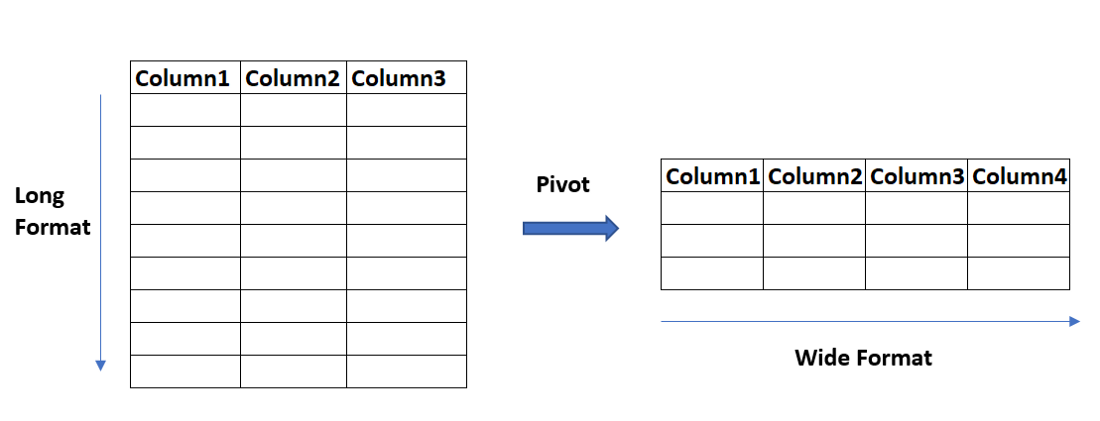

    Source: https://stackoverflow.com/questions/47152691/how-can-i-pivot-a-dataframe

In [50]:
# import new dataset

sales = pd.read_csv("salesmen.csv")
sales

,Date,Salesman,Revenue
0,1/1/16,Bob,7172
1,1/2/16,Bob,6362
2,1/3/16,Bob,5982
3,1/4/16,Bob,7917
4,1/5/16,Bob,7837
...,...,...,...
1825,12/27/16,Oscar,835
1826,12/28/16,Oscar,3073
1827,12/29/16,Oscar,6424
1828,12/30/16,Oscar,7088


In [51]:
sales.pivot(index="Date", columns="Salesman", values = "Revenue")
# parameters customize new/pivoted Df:
    # index: column of original Df whose values you want to set as index in new Df
    # columns: column of original Df whose values must become the new columns of the Df
    # values: column(s) of original Df whose values will be distributed as values among new columns & rows of new Df

Salesman,Bob,Dave,Jeb,Oscar,Ronald
Date,,,,,
1/1/16,7172,1864,4430,5250,2639
1/10/16,7543,7105,301,7663,8267
1/11/16,1053,6851,9489,8888,1340
1/12/16,4362,7147,8719,3092,279
1/13/16,6812,6160,2349,6139,7540
...,...,...,...,...,...
9/5/16,992,211,2439,7743,4252
9/6/16,556,7293,7585,5072,1112
9/7/16,6499,9774,6669,5230,3608


## 10. The `melt` Method

- The `melt` method is the **inverse** of the `pivot` method.
- It takes a **'wide' dataset and converts it to a 'tall' dataset**.
- The `melt` method is ideal when you have multiple columns storing the same data point.
- Ask yourself whether the column's values are a type of the column header. If they're not, the data is likely stored in a wide format.
- The `id_vars` parameter accepts the column whose values will be repeated for every column.
- The `var_name` parameter sets the name of the new column for the varying values (the former column names).
- The `value_name` parameter sets the new name of the values column (holding the values from the original DataFrame).


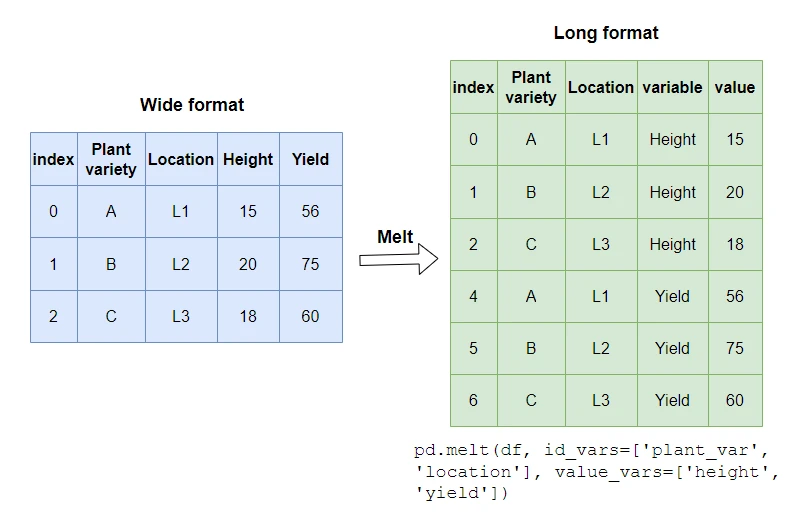

    Source: https://www.reneshbedre.com/blog/melt-pandas-dataframe.html

In [52]:
quarters = pd.read_csv("quarters.csv")
quarters

,Salesman,Q1,Q2,Q3,Q4
0,Boris,602908,233879,354479,32704
1,Bob,43790,514863,297151,544493
2,Tommy,392668,113579,430882,247231
3,Travis,834663,266785,749238,570524
4,Donald,580935,411379,110390,651572
5,Ted,656644,70803,375948,321388
6,Jeb,486141,600753,742716,404995
7,Stacy,479662,742806,770712,2501
8,Morgan,992673,879183,37945,293710


In [53]:
# how to know this is a 'wide' Df:
# 1) in this dataset 'revenue' is spread out over several columns: same data point is spread over multiple columns
# 2) while the value 'Boris' is a subtype of 'Salesman', the value '602908' is not a subtype of 'Quarter 1'
# both elements indicate this must be a wide table

quarters.melt(id_vars = "Salesman")
# in fact, this method only needs 1 parameter to work:
# id_vars = column whose values that are going to stay; for us: this is Salesman 
# example: for 'Boris', we will need 1 row for Q1, 1 row for Q2, 1 row for Q3, 1 row for Q4
# so, 'Boris' will be repeating in new Df

,Salesman,variable,value
0,Boris,Q1,602908
1,Bob,Q1,43790
2,Tommy,Q1,392668
3,Travis,Q1,834663
4,Donald,Q1,580935
5,Ted,Q1,656644
6,Jeb,Q1,486141
7,Stacy,Q1,479662
8,Morgan,Q1,992673
9,Boris,Q2,233879


In [54]:
# Pandas names column with Q1,Q2,Q3,Q4 the 'variable'
# because these are our varying values

# if you want to change name of variable column & name of value column:
quarters.melt(id_vars = "Salesman", var_name = "Quarter", value_name="Revenue")

,Salesman,Quarter,Revenue
0,Boris,Q1,602908
1,Bob,Q1,43790
2,Tommy,Q1,392668
3,Travis,Q1,834663
4,Donald,Q1,580935
5,Ted,Q1,656644
6,Jeb,Q1,486141
7,Stacy,Q1,479662
8,Morgan,Q1,992673
9,Boris,Q2,233879


In [55]:
# if we now look back and apply our method for classifying wide vs tall tables again:
# we see that each of the values in a column are 'subtypes' of the header of that column
# proof that this is a 'tall' dataset

## 11. The pivot_table Method

- The `pivot_table` method operates similarly to the Pivot Table feature in Excel.
- A pivot table is a table whose values are aggregations of groups of values from another table.
- The `values` parameter accepts the numeric column whose values will be aggregated.
- The `aggfunc` parameter declares the aggregation function (the default is mean/average).
- The `index` parameter sets the index labels of the pivot table. MultiIndexes are permitted.
- The `columns` parameter sets the column labels of the pivot table. MultiIndexes are permitted.


In [56]:
foods = pd.read_csv("foods.csv")
foods.head()

,First Name,Gender,City,Frequency,Item,Spend
0,Wanda,Female,Stamford,Weekly,Burger,15.66
1,Eric,Male,Stamford,Daily,Chalupa,10.56
2,Charles,Male,New York,Never,Sushi,42.14
3,Anna,Female,Philadelphia,Once,Ice Cream,11.01
4,Deborah,Female,Philadelphia,Daily,Chalupa,23.49


In [57]:
# let's summarize the numeric column of this table by calling the pivot_table() method
foods.pivot_table(values = "Spend", index="Gender")

# values: what numeric data do we want to summarize: 'Spend'
# index: what do you want to group by, what category do we want to summarize the Spend under, 
# ex. 'Spend' by 'Gender'? Spend by City?

,Spend
Gender,
Female,50.709629
Male,49.397623


In [58]:
# by default summarization function pivot_table performs = take average
# so, we see Female spend on average a bit more than Male

# we can specify which aggregation function we want to perform:

foods.pivot_table(values = "Spend", index="Gender", aggfunc="sum")


,Spend
Gender,
Female,25963.33
Male,24106.04


In [60]:
# but we can also provide a MultiIndex for index
# that is to say: pass in list that specifies that first we want to group by index A, then by index B
# for example, first group by 'Gender', then by 'Item'

foods.pivot_table(values = "Spend", index=["Gender", "Item"], aggfunc="mean")

Spend
Gender Item                
Female Burger     49.930488
       Burrito    50.092000
       Chalupa    54.635000
       Donut      49.926316
       Ice Cream  49.788519
       Sushi      50.355699
Male   Burger     49.613919
       Burrito    48.344819
       Chalupa    49.186761
       Donut      43.649565
       Ice Cream  51.096000
       Sushi      55.614384

In [61]:
# we can go even further and specify a column axis
# see each average spend for women & men per item and per city

foods.pivot_table(values = "Spend", index=["Gender", "Item"], columns="City", aggfunc="mean")

City               New York  Philadelphia   Stamford
Gender Item                                         
Female Burger     51.626667     52.878710  45.037778
       Burrito    42.563043     52.098571  53.532647
       Chalupa    46.135789     52.291562  64.094000
       Donut      46.670323     54.642000  48.734118
       Ice Cream  56.356296     46.225625  46.910455
       Sushi      47.751290     58.096000  45.622188
Male   Burger     58.822273     44.675238  46.424516
       Burrito    55.976000     43.764333  46.438929
       Chalupa    49.110800     48.444783  50.011304
       Donut      44.842333     37.859394  49.004483
       Ice Cream  55.297586     53.445610  42.368800
       Sushi      51.709259     49.852857  70.434444

In [62]:
# we can also make MultiIndex in column axis
foods.pivot_table(values = "Spend", index="Item", columns=["Gender","City"], aggfunc="mean")

Gender        Female                               Male               \
City        New York Philadelphia   Stamford   New York Philadelphia   
Item                                                                   
Burger     51.626667    52.878710  45.037778  58.822273    44.675238   
Burrito    42.563043    52.098571  53.532647  55.976000    43.764333   
Chalupa    46.135789    52.291562  64.094000  49.110800    48.444783   
Donut      46.670323    54.642000  48.734118  44.842333    37.859394   
Ice Cream  56.356296    46.225625  46.910455  55.297586    53.445610   
Sushi      47.751290    58.096000  45.622188  51.709259    49.852857   

Gender                
City        Stamford  
Item                  
Burger     46.424516  
Burrito    46.438929  
Chalupa    50.011304  
Donut      49.004483  
Ice Cream  42.368800  
Sushi      70.434444

In [64]:
# other aggfunctions:
foods.pivot_table(values = "Spend", index="Item", columns=["Gender","City"], aggfunc="count")
foods.pivot_table(values = "Spend", index="Item", columns=["Gender","City"], aggfunc="max")
foods.pivot_table(values = "Spend", index="Item", columns=["Gender","City"], aggfunc="min")

Gender      Female                           Male                      
City      New York Philadelphia Stamford New York Philadelphia Stamford
Item                                                                   
Burger       98.96        97.79    85.06    90.32        99.68    97.20
Burrito      92.25        96.79    99.21    98.04        93.27    95.07
Chalupa      98.43        99.29    98.78    96.44        98.40    99.87
Donut        95.63        96.52    91.75    86.70        93.12    99.26
Ice Cream    97.83        88.14    97.44    97.65        99.24    99.17
Sushi        99.51        99.02    95.43    93.85        97.12    98.48